<a href="https://colab.research.google.com/github/surendarmanoj/data-science/blob/main/Elasticnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [ ]:

data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [ ]:
m1 = ElasticNet(alpha=0.2, l1_ratio=.5)

In [ ]:
m1.fit(X_train, y_train)

ElasticNet(alpha=0.2)

In [ ]:
m1.predict(X_test)
y_pred = m1.predict(X_test)
r2_score = r2_score(y_test,y_pred)

0.0441176650456756

In [ ]:
m1.coef_

array([  6.64754215,   0.50583526,  19.64046917,  14.96124843,
         6.14097623,   4.53925359, -12.11575154,  12.71614219,
        19.30706773,  11.33383245])

Text(0.5, 1.0, 'Alpha = 0 ,r2_score = <function r2_score at 0x7da1c4b6bb00>')

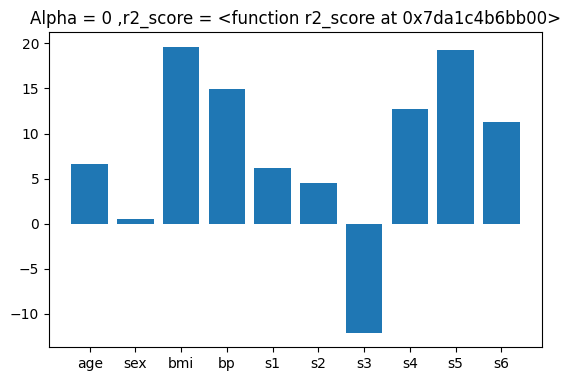

In [ ]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,m1.coef_)
plt.title('Alpha = 0 ,r2_score = {}'.format(r2_score,2))

In [22]:
coefs = []
r2_scores = []
l1_score = [0,0.1, 0.25, 0.5, 0.6, 0.75, 0.9,1]

for i in l1_score:
    elastic = ElasticNet(alpha=i)
    elastic.fit(X_train,y_train)

    coefs.append(elastic.coef_.tolist())
    y_pred = elastic.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

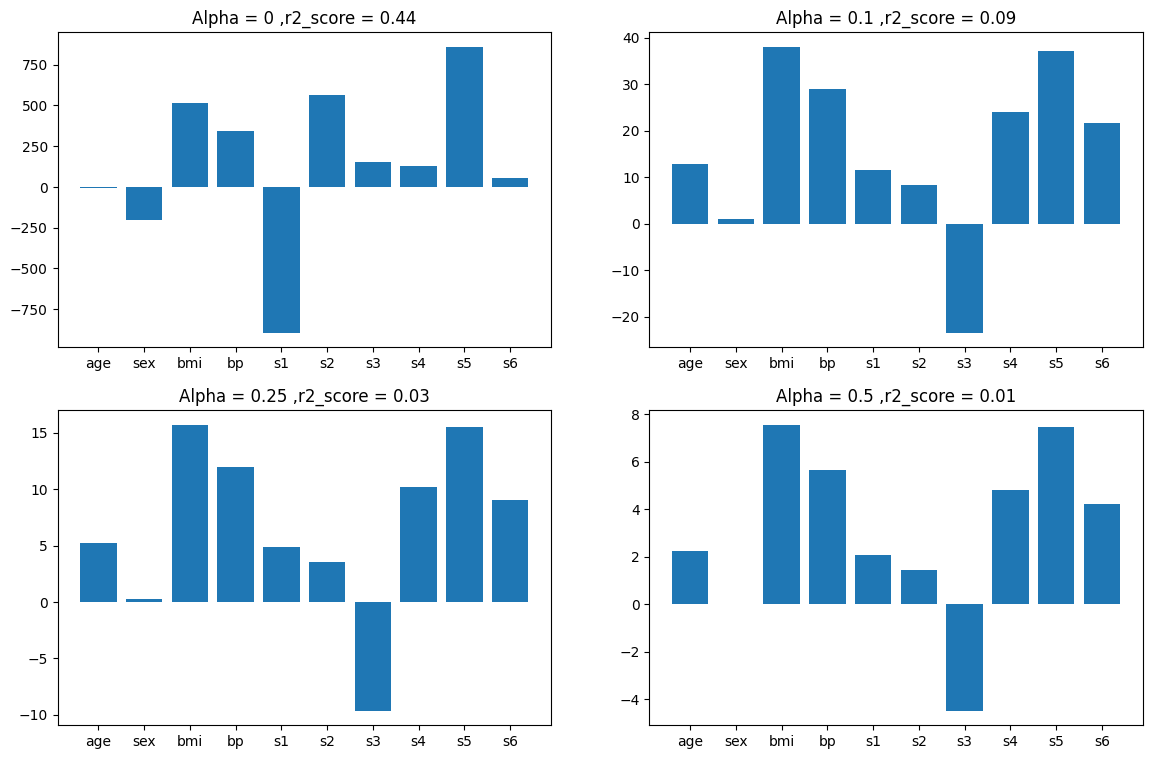

In [ ]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[0], round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[1], round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[2], round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[3], round(r2_scores[3],2)))

plt.show()

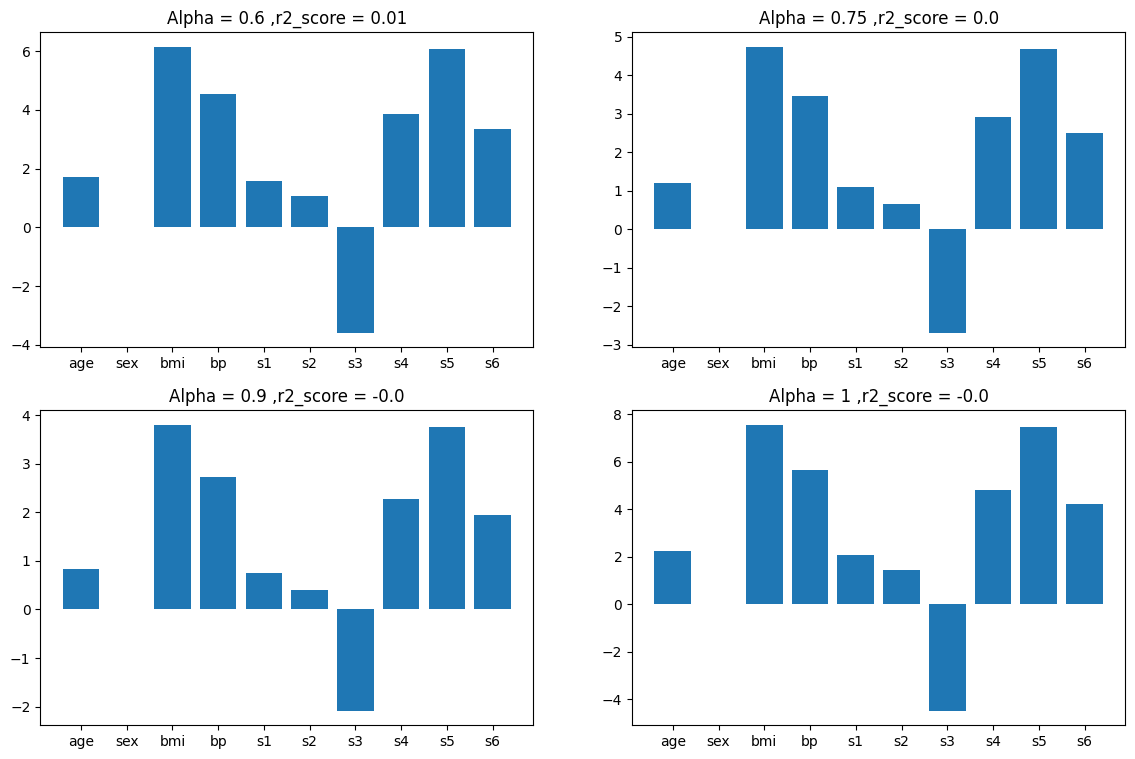

In [ ]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[4])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[4], round(r2_scores[4],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[5])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[5], round(r2_scores[5],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[6])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[6], round(r2_scores[6],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = {} ,r2_score = {}'.format(l1_score[7], round(r2_scores[7],2)))

plt.show()